In [4]:
import os, sys, glob, scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Plan

1. Describe the task
2. Make the simplest visualization you can think of that contains:
    - the Dependent Variable, i.e. the behavior of the participants that you're trying to model/predict/explain/account for/etc
    - the Independent Variable(s), i.e. the features of the trial that you think might influence behavior
    - draw each trial as a point on this graph
3. Think of possible models that would generate similar values for the DV given the observed values for the IV

## 2. Make a visualization

##### Load some data

In [2]:
base_dir = os.path.realpath('')
data_dir = base_dir + '/Data'
print(base_dir)

/Users/jeroen/Dropbox (Brown)/Postdoc FHL/Teaching/Computational_modeling_tutorial


In [3]:
data = pd.read_csv(data_dir + '/Study1_UG.csv')
data = data[['sub','trial','unfairness','choice']]
data['offer'] = 100 - data['unfairness']
data.head()

,sub,trial,unfairness,choice,offer
0,1,1,50,0,50
1,1,2,80,0,20
2,1,3,95,0,5
3,1,4,60,0,40
4,1,5,75,0,25


##### Make a simple plot of subject 2's data

In [4]:
sub = 2
sub_data = data.query('sub == 2')
sub_data.head()

,sub,trial,unfairness,choice,offer
20,2,1,60,0,40
21,2,2,55,0,45
22,2,3,85,1,15
23,2,4,95,1,5
24,2,5,65,0,35


##### 1. A plot where each data point is plotted independently, with 50% transparency to show overlapping points

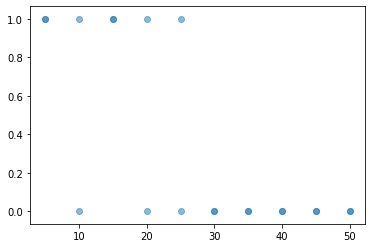

In [5]:
plt.scatter(x = sub_data['offer'], y = sub_data['choice'], alpha = .5)

##### 2. A plot where you average over trials with the same offer

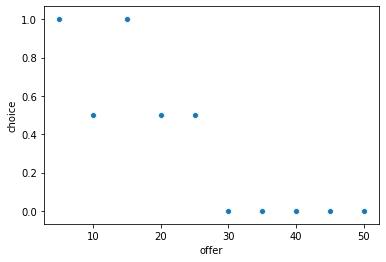

In [6]:
sns.scatterplot(x = 'offer', y = 'choice',
            data = sub_data.groupby(['offer'], as_index = False).mean())

## 3. Think of a model that can recreate this plot

- Model 1: always accept.
- Model 2: always reject.
- Model 3: act randomly.
- Model 4: maximize payoff ('greed').
- Model 5: minimize payoff ('inverse greed').
- Model 6: unfairness punisher (reject with a probability P proportional to the unfairness of the offer).
- Model 7: inequity aversion.

These models are written as Python functions, in which the input always contains the 'offer' of the current Ultimatum Game trial, and in which the output always contains the 'choice' made by the participant in response to that offer. The choice is expressed as 0 (accept) or 1 (reject).

In [7]:
# Model 1: always accept
def model_1(offer):
    
    choice = 0
    
    return choice

In [8]:
# Model 2: always reject
def model_2(offer):
    
    choice = 1
    
    return choice

In [9]:
# Model 3: act randomly
def model_3(offer):
    
    choice = np.random.randint(0,2)
    
    return choice

In [2]:
# Model 4: maximize payoff
def model_4(offer):
    
    choice_options = [0,1]
    payoffs = [offer,0]
    
#     # Find the highest-payoff choice option:
#     if payoffs[0] > payoffs[1]:
#         choice = choice_options[0]
#     elif payoffs[1] > payoffs[0]:
#         choice = choice_options[1]
#     else:
#         choice = choice_options[np.random.randint(0,len(choice_options))]
    
    # A quicker way?
    choice_index = np.where(payoffs == np.max(payoffs))[0][0]
    choice = choice_options[choice_index]
    
    return choice

In [1]:
# Model 5: minimize payoff
def model_5(offer):
    
    choice_options = [0,1]
    payoffs = [offer,0]
    
    choice_index = np.where(payoffs == np.min(payoffs))[0][0]
    choice = choice_options[choice_index]
    
    return choice

In [9]:
# Model 6: unfairness punisher
def model_6(offer):
    
    if np.random.rand() < offer/50:
        choice = 0
    else: 
        choice = 1
    
    return choice

In [10]:
# Model 7: inequity aversion
def model_7(params, offer):

    # Inequity aversion model with one inequity term (= symmetric) and a money term
    payoffs = [offer, 0]
    inequities = [(100-offer)-offer, 0]
    utilities = payoffs - np.multiply(params[0],inequities)
    choice = np.where(utilities == np.max(utilities))[0][0]

    return choice

## 4. Simulating task data

In [25]:
simulated_sub_data = sub_data[['trial','offer','choice']].copy()
simulated_sub_data['choice'] = np.nan
simulated_sub_data.head()

,trial,offer,choice
20,1,40,NaN
21,2,45,NaN
22,3,15,NaN
23,4,5,NaN
24,5,35,NaN


In [29]:
chosen_model = model_4

for trial in simulated_sub_data['trial']:
    # Get the offers from the dataset
    offer = simulated_sub_data.loc[simulated_sub_data['trial']==trial, 'offer'].values
    # Using the chosen model, simulate choices 
    predicted_choice = chosen_model(offer)
    # Add the simulated choices to the dataframe
    simulated_sub_data.loc[simulated_sub_data['trial']==trial,'choice'] = predicted_choice

In [31]:
simulated_sub_data.head()

,trial,offer,choice
20,1,40,0.0
21,2,45,0.0
22,3,15,0.0
23,4,5,0.0
24,5,35,0.0


So here we have a dataset – basically a list of trials that together constitute an experiment – with simulated task data! We've basically generated a pseudo-subject based on one of the models we defined. In the next steps, we will compare such simulated datasets to our actually observed subject data. The more similar a model's simulation is to observed task data, the better the model 'fits' the data.

## For next time

- Get Joey's data from GitHub
- Try to code models 5, 6, and 7
- Simulate data from each model